In [46]:
import numpy as np
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.metrics import (recall_score, confusion_matrix, ConfusionMatrixDisplay)
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [47]:
def load_data():
    df = pd.read_excel("AI_CHIR_DIG_FINAL.xlsx", sheet_name="Second cleanup")
    return df

df_raw = load_data()

df_raw

,AGE_SURGERY,SEX,FHX,FHX_1DEGREE,TOBACCO,BMI,PHX_ABDOMINAL_SURGERY,PHX_PULM,PHX_CVD,ATCD_COLONO,...,INVOLVEMENT_DISTAL.MARGIN,SAFETY.MARGIN_PROXIMAL,SAFETY.MARGIN_DISTAL,INVASION_PERINEURAL,INVASION_VASC,INVASION_LYMPH,PATH_TUMOR.PERFORATION,SUPP_N0_N+,NUM_LN_ALL,NUM_LN_POS
0,61,F,0,0.0,1.0,16.23,1.0,0,1,1.0,...,1,19.0,1.0,2.0,1.0,1.0,2.0,N0,19,0.0
1,70,H,0,0.0,0.0,27.68,0.0,0,1,0.0,...,1,14.2,0.5,2.0,1.0,1.0,1.0,N1a,23,1.0
2,39,H,0,0.0,1.0,20.23,0.0,1,1,0.0,...,1,13.0,2.8,1.0,1.0,1.0,1.0,N1a,40,1.0
3,38,H,1,0.0,1.0,20.30,0.0,1,0,0.0,...,1,14.0,16.0,2.0,2.0,1.0,1.0,NaN,25,6.0
4,25,F,0,0.0,0.0,17.30,1.0,0,0,0.0,...,2,NaN,NaN,1.0,1.0,1.0,1.0,N1b,35,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,73,H,0,0.0,0.0,NaN,0.0,0,1,0.0,...,1,5.0,11.5,1.0,2.0,2.0,1.0,N0,32,0.0
224,55,H,0,0.0,1.0,25.73,0.0,1,1,0.0,...,1,9.0,10.0,1.0,2.0,1.0,1.0,N0,32,0.0
225,58,H,0,NaN,1.0,21.60,0.0,1,1,0.0,...,1,5.8,16.5,1.0,2.0,1.0,1.0,N0,51,0.0
226,82,H,0,0.0,1.0,NaN,1.0,1,1,1.0,...,1,6.5,18.0,2.0,1.0,2.0,1.0,N0,30,0.0


In [48]:
selected_inputs = ["SEX", "FHX", "BMI", "PHX_ABDOMINAL_SURGERY"]
selected_target = ["COMPLICATION"]

In [49]:
# drop the rows where value is missing in inputs and target
df_raw = df_raw.dropna(subset=selected_inputs + selected_target).reset_index(drop=True)

df_raw

,AGE_SURGERY,SEX,FHX,FHX_1DEGREE,TOBACCO,BMI,PHX_ABDOMINAL_SURGERY,PHX_PULM,PHX_CVD,ATCD_COLONO,...,INVOLVEMENT_DISTAL.MARGIN,SAFETY.MARGIN_PROXIMAL,SAFETY.MARGIN_DISTAL,INVASION_PERINEURAL,INVASION_VASC,INVASION_LYMPH,PATH_TUMOR.PERFORATION,SUPP_N0_N+,NUM_LN_ALL,NUM_LN_POS
0,61,F,0,0.0,1.0,16.23,1.0,0,1,1.0,...,1,19.0,1.0,2.0,1.0,1.0,2.0,N0,19,0.0
1,70,H,0,0.0,0.0,27.68,0.0,0,1,0.0,...,1,14.2,0.5,2.0,1.0,1.0,1.0,N1a,23,1.0
2,39,H,0,0.0,1.0,20.23,0.0,1,1,0.0,...,1,13.0,2.8,1.0,1.0,1.0,1.0,N1a,40,1.0
3,38,H,1,0.0,1.0,20.30,0.0,1,0,0.0,...,1,14.0,16.0,2.0,2.0,1.0,1.0,NaN,25,6.0
4,25,F,0,0.0,0.0,17.30,1.0,0,0,0.0,...,2,NaN,NaN,1.0,1.0,1.0,1.0,N1b,35,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,73,H,0,NaN,0.0,28.08,0.0,0,1,0.0,...,1,16.0,12.0,2.0,2.0,2.0,1.0,N1b,38,1.0
204,81,H,0,0.0,0.0,24.80,0.0,1,1,0.0,...,1,5.5,23.0,1.0,2.0,2.0,1.0,N0,12,0.0
205,55,H,0,0.0,1.0,25.73,0.0,1,1,0.0,...,1,9.0,10.0,1.0,2.0,1.0,1.0,N0,32,0.0
206,58,H,0,NaN,1.0,21.60,0.0,1,1,0.0,...,1,5.8,16.5,1.0,2.0,1.0,1.0,N0,51,0.0


In [50]:
# transform to int COMPLICATION
df_raw[selected_target] = df_raw[selected_target].astype(int)


In [51]:
X = df_raw[selected_inputs]
y = df_raw[selected_target].values.ravel().astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

In [52]:
model_configs = {
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            "clf__n_estimators": [50, 100],
            "clf__max_depth": [None, 10, 20],
        },
        "requires_encoding": False
    },
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000, class_weight="balanced"),
        "params": {
            "clf__C": [0.01, 0.1, 1.0, 10.0]
        },
        "requires_encoding": True
    },
    "SVM": {
        "model": SVC(probability=True, class_weight="balanced"),
        "params": {
            "clf__C": [0.1, 1, 10],
            "clf__kernel": ["rbf", "linear"]
        },
        "requires_encoding": True
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(),
        "params": {
            "clf__n_estimators": [50, 100],
            "clf__learning_rate": [0.05, 0.1]
        },
        "requires_encoding": False
    }
}

In [ ]:
results = []
pipelines = {}

# Pre-compute column groups
cat_cols = X_train.select_dtypes(include="object").columns.tolist()
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

# Identify binary vs continuous numericals
binary_cols = [col for col in num_cols if X_train[col].nunique() == 2]
cont_cols   = [col for col in num_cols if X_train[col].nunique() > 2]

for name, config in model_configs.items():
    print(f"Training {name}...")

    # Categorical transformer
    if config["requires_encoding"]:
        cat_transformer = Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("encoder", OneHotEncoder(handle_unknown="ignore"))
        ])
    else:
        cat_transformer = Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
        ])

    # Continuous numerical transformer (impute then scale)
    cont_transformer = Pipeline([
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ])

    # Assemble ColumnTransformer
    preprocessor = ColumnTransformer([
        ("cat",    cat_transformer,  cat_cols),
        ("cont",   cont_transformer, cont_cols),
        ("binary","passthrough",     binary_cols),
    ], remainder="drop")  # we've explicitly handled all columns

    # Full pipeline
    pipeline = Pipeline([
        ("preprocessing", preprocessor),
        ("clf",          config["model"])
    ])

    # Grid search
    grid = GridSearchCV(
        pipeline,
        config["params"],
        cv=10,
        scoring="recall_macro",
        n_jobs=-1
    )
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)

    recall_macro = recall_score(y_test, y_pred,  labels=[0, 1], average="macro", zero_division=1)
    recall_per_class = recall_score(y_test, y_pred, average=None, zero_division=1)

    results.append((name, recall_macro, recall_per_class, grid.best_estimator_))

    pipelines[name] = grid.best_estimator_

# Pick best
results.sort(key=lambda x: x[1], reverse=True)
best_model_name, best_recall_macro, best_recall_per_class, best_pipeline = results[0]

print(f"\n✅ Best model: {best_model_name}")
print(f"Macro Recall: {best_recall_macro:.4f}")
for idx, r in enumerate(best_recall_per_class):
    print(f"Recall for class {idx}: {r:.4f}")

Training Random Forest...
Training Logistic Regression...
Training SVM...
Training Gradient Boosting...

✅ Best model: Gradient Boosting
Macro Recall: 0.6250
Recall for class 0: 1.0000
Recall for class 1: 0.2500


In [54]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       1.00      0.25      0.40         4

    accuracy                           0.86        21
   macro avg       0.93      0.62      0.66        21
weighted avg       0.88      0.86      0.82        21



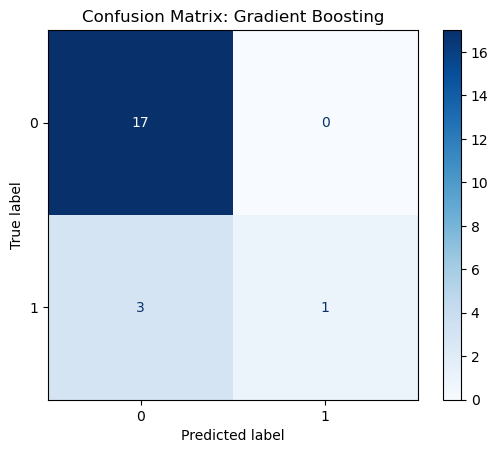

In [ ]:
# matrice de confusion
cm = confusion_matrix(y_test, best_pipeline.predict(X_test), labels=[0, 1])
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title(f"Confusion Matrix: {best_model_name}")
plt.show()